In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('kc_house_data.csv', usecols=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'price', 'yr_built'])

In [8]:
#Melihat 5 baris teratas dari data.
#Independent variabel(x) adalah bedrooms, bathrooms, sqft_living, grade, yr_built.
#Dependent variabel(y) adalah price.
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987


In [17]:
#Mengetahui jumlah kolom dan baris dari data
#Data kita mempunya 6 kolom (features) dengan 21613 baris
df.shape

(21613, 6)

In [18]:
#Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
#Dapat dilihat bahwa seluruh data sudah di dalam bentuk numerik
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   grade        21613 non-null  int64  
 5   yr_built     21613 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


In [19]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll
df.describe()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,7.656873,1971.005136
std,3.673622e+05,0.930062,0.770163,918.440897,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,13.000000,2015.000000


In [20]:
#Mrubah tipe data dari bathrooms yang semula float menjadi int
df['bathrooms'] = df['bathrooms'].astype('int')

In [21]:
#Mengganti nilai 33 menjadi 3
df['bedrooms'] = df['bedrooms'].replace(33,3)

In [22]:
#Mencari dan menangani missing values
#Ternyata data kita tidak ada missing values
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
grade          0
yr_built       0
dtype: int64

In [23]:
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


d:\project\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


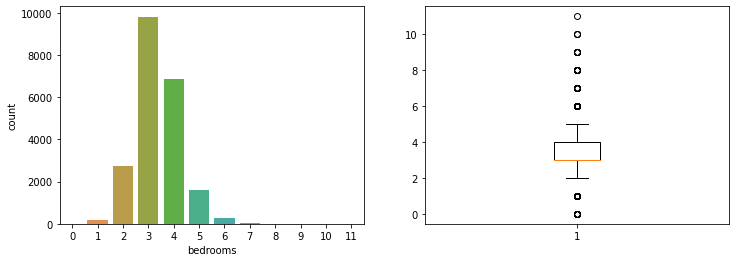

In [24]:
#Univariate analysis bedrooms
#Melihat distribusi dari bedrooms
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['bedrooms'])

f.add_subplot(1,2,2)
plt.boxplot(df['bedrooms'])
plt.show()

d:\project\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


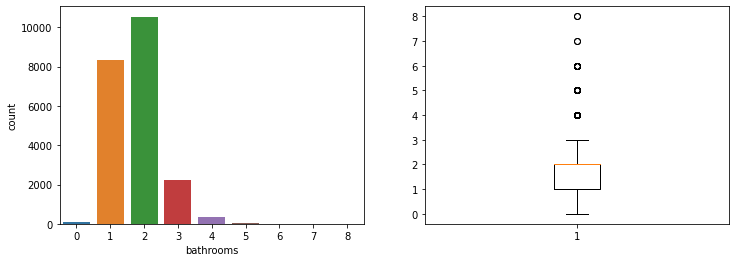

In [25]:
#Univariate analysis bathrooms
#Melihat distribusi dari bathrooms
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['bathrooms'])

f.add_subplot(1,2,2)
plt.boxplot(df['bathrooms'])
plt.show()

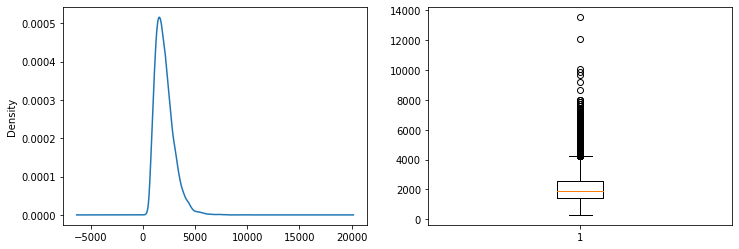

In [26]:
#Univariate analysis sqft_living
#Melihat distribusi dari sqft_living
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['sqft_living'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['sqft_living'])
plt.show()

d:\project\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


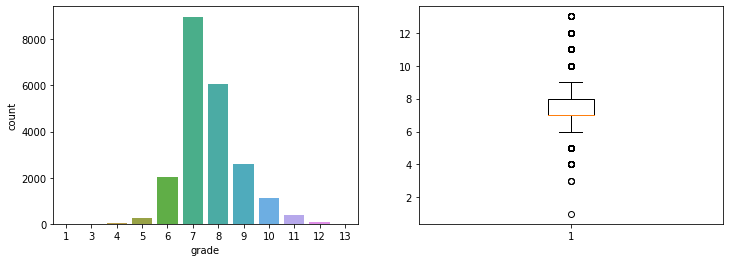

In [27]:
#Univariate analysis grade
#Melihat distribusi dari grade
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['grade'])

f.add_subplot(1,2,2)
plt.boxplot(df['grade'])
plt.show()

d:\project\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


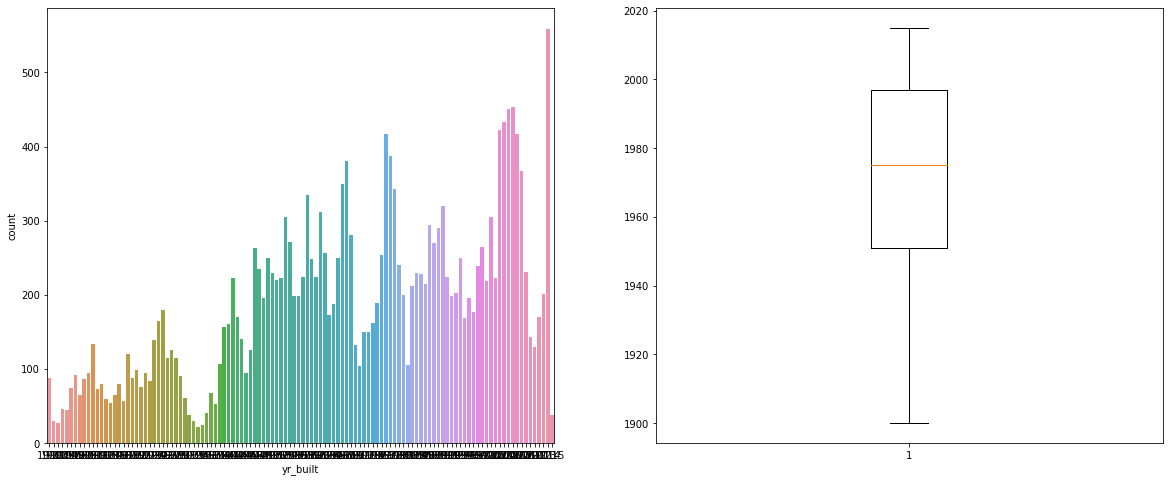

In [28]:
#Univariate analysis yr_built
#Melihat distribusi dari yr_built
f = plt.figure(figsize=(20,8))

f.add_subplot(1,2,1)
sns.countplot(df['yr_built'])

f.add_subplot(1,2,2)
plt.boxplot(df['yr_built'])
plt.show()

d:\project\python\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

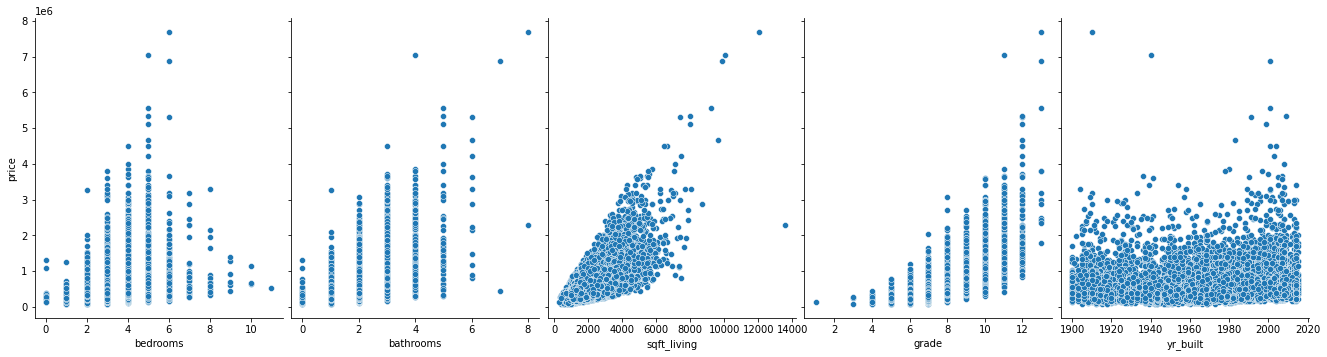

In [29]:
#Bivariate analysis antara independent variable dan dependent variable
#Melihat hubungan antara independent dan dependent
#Menggunakan pairplot
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built'], y_vars=['price'], size=5, aspect=0.75)
plt.show()

In [30]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable
df.corr().style.background_gradient().set_precision(2)

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
price,1.00,0.32,0.51,0.70,0.67,0.05
bedrooms,0.32,1.00,0.48,0.59,0.37,0.16
bathrooms,0.51,0.48,1.00,0.70,0.61,0.43
sqft_living,0.70,0.59,0.70,1.00,0.76,0.32
grade,0.67,0.37,0.61,0.76,1.00,0.45
yr_built,0.05,0.16,0.43,0.32,0.45,1.00


In [31]:
#Recall data kita
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


In [32]:
#MODELING
#Pertama, buat variabel x dan y
x = df.drop(columns='price')
y = df['price']

In [33]:
#Kedua, kita split data kita menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [34]:
#Cek shape dari data training dan testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17290, 5)
(17290,)
(4323, 5)
(4323,)


In [10]:
#Ketiga, kita bikin object linear regresi
lin_reg = LinearRegression()

In [11]:
#Keempat, train the model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

LinearRegression()

In [12]:
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-49153.02097214  62946.39413349    183.75469989 131564.28622994
  -4078.99048223]
7222922.234075839


In [13]:
#Kita coba buat kedalam dataframe agar kebih rapi
coef_dict = {
    'features': x.columns,
    'coef_value':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,bedrooms,-49153.020972
1,bathrooms,62946.394133
2,sqft_living,183.754700
3,grade,131564.286230
4,yr_built,-4078.990482


In [14]:
y_pred = lin_reg.predict(x_test)

In [15]:
#Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
lin_reg.score(x_test, y_test)

0.6100542485955927

In [16]:
#Prediksi harga rumah idaman Yusron
lin_reg.predict([[1,1,1200,8,2000]])

array([351754.57249161])